# Individual Homework 1

## Jordan Hall

## Math 8660

In [11]:
# Import needed packages
# I took all of the package calls below from class Notebook-2

import dolfin as fn
import numpy as np

from matplotlib import pyplot as plt
%matplotlib notebook

from IPython.display import HTML, display
display(HTML("<style>.container { width:95% !important; }</style>"))

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Problem 1

1. Let $\Omega=(0,2)\subset\mathbb{R}$ and consider the functions
	$$
		u(x) = \begin{cases}
				x, & 0<x\leq 1, \\
				1, & 1<x<2, 
				\end{cases}
				\text{ and } 
		v(x) = \begin{cases}
				1, & 0<x\leq 1, \\
				0, & 1<x<2.
				\end{cases}
	$$
	
(a.) Prove that $v=u^\prime$ in the weak sense.

(b.) Prove that if $u(x)=2$ instead of $1$ on $1<x<2$ that $u$ does not have a weak derivative. 


### Solution 1. (a.)

We begin by showing that $u \in L^1_{loc}(\Omega)$. Indeed, any open set $S \Subset \Omega$ is contained by a compact set $K_S \subset \Omega$, which may be written $K_S=[\epsilon,2-\epsilon]$ for some $\epsilon \in (0,1)$ where $\epsilon$ depends on $S$. Since $u$ is strictly positive in $\Omega$, we have $$\int_S |u(x)|dx < \int_{K_S} u(x)dx=\int_\epsilon^1 x dx + \int_1^{2-\epsilon} dx= \frac{(3+\epsilon)(1-\epsilon)}{2}< \infty  .$$ Hence, $u \in L^1(S)$ for any open $S \Subset \Omega$; therefore, $u \in L^1_{loc}(\Omega)$.


Assuming $u \in L^1_{loc}(\Omega)$ - which we verified above - we call $g$ the weak derivative of $u \iff g \in L^1_{loc}(\Omega)$ and $T_g = D^\alpha T_u$. To show the latter condition, we must verify that $T_g(h)=D^\alpha T_u(h)$ for every $h \in \mathcal{D}(\Omega)$, which is the space of $C_C^\infty(\Omega)$ "test functions" continuously differentiable at all orders and with compact support on $\Omega$. 

Let $h \in \mathcal{D}(\Omega)$. In this setting $\alpha=1$ and $$(-1)^{|\alpha|}D^\alpha T_u (h)= T_u(D^1 h)=\int_\Omega u h' dx.$$ We compute the integral above by splitting it into two integrals and performing integration by parts on each:

$$-D^\alpha T_u (h)=\int_0^1 xh'dx + \int_1^2 h'dx=\left(xh|_0^1 - \int_0^1 h dx\right) + \left(h|_1^2\right)=-\int_0^1 h dx.$$

We note that the values $h(1)$ cancel with each other in the evaluations above; also, $h(2)=0$ since supp$(h) \Subset \Omega.$ 

Now we notice that $$-\int_0^1 h dx = -\int_\Omega vh dx= - T_v(h).$$ Therefore, $$T_v(h) =D^\alpha T_u(h) \quad \forall \quad h \in \mathcal{D}(\Omega).$$ 

It remains to show that $v \in L^1_{loc}(\Omega).$ We will do so in a similar fashion to how we verified $u \in L^1_{loc}(\Omega)$. Given any open set $S \Subset \Omega$, we write $K_S$ which we know can be expressed as $ K_S=[\epsilon, 2-\epsilon]$ for an $\epsilon \in (0,1)$ depending on $S$ only. Then since $v(x)$ is a positive function on $\Omega$, $$\int_S |v(x)|dx < \int_{K_S} v(x)dx=\int_\epsilon^1 dx=1-\epsilon<\infty.$$ Hence, $v \in L^1(S)$ for any open $S \Subset \Omega$; therefore, $v \in L^1_{loc}(\Omega)$.

We have shown $v$ the weak derivative of $u$ since $v \in L^1_{loc}(\Omega)$ and $T_v = D^1 T_u.$

### Solution 1. (b.)

We have an identical setup as above, but now $u(x)=2$ for all $x \in (1,2)$. This will affect the integral which appears when we formulate $D^1T_u(h)$. Let $h \in \mathcal{D}(\Omega)$. We have

$$-D^1 T_u(h)=\int_0^1 xh'dx + \int_1^2 2h'=\left( h(1) - \int_0^1 hdx \right) -2h(1)=- \int_0^1 hdx-h(1),$$ where $h(2)$ vanishes since supp$(h)\Subset \Omega$. In part (a.), we were able to show that the integral $\int_0^1 hdx$ could be expressed $\int_\Omega hvdx$, which was key in showing $v$ was the weak derivative of $u$ (as it was defined originally). But now we must account for the term $h(1)$. In other words, we must determine if there exists a function $k(x) \in L^1_{loc}(\Omega)$ such that $\int_\Omega khdx=h(1)$ for all $h \in \mathcal{D}(\Omega)$. If so, we could combine this result with results from part (a.) to say $v+k=u'$ weakly. But we notice that such a $k$ looks like a shifted Dirac delta function, which we know fails to be in $L^1_{loc}(\Omega)$. 

By way of contradiction, assume such a $k$ exists. That is, assume $\exists k \in L^1_{loc}(\Omega)$ such that $\int_\Omega khdx=h(1)$ for all $h \in \mathcal{D}(\Omega)$. Now define a sequence of functions $\{h_j(x)\}_{n \in \mathbb{N}}$ such that $0 \leq h_j(x) \leq 1$, $h_j(1)=1$, and $h_j(x) \to 0$ $\forall x \neq 1$. Then notice $$1=\lim_{j \to \infty} h_j(1)=\lim_{j \to \infty}\int_\Omega kh_jdx=\int_\Omega \lim_{j \to \infty} kh_jdx=0.$$ We have clearly arrived at a contradiction. Therefore, such a $k$ does not exist in $L^1_{loc}(\Omega)$ which implies that $u$ is not weakly differentibale. 

## Problem 2

Let $\Omega\subset\mathbb{R}^n$ and provide a brief discussion about the types of singularities and decay rates allowable in an $L^p(\Omega)$ space for some context (suppose $\Omega$ is either bounded or unbounded separately). Hint: In this context, you may find it useful to recall and interpret the theorem that states if $(\Omega,\mathcal{F},\mu)$ is a measure space with $\mu(\Omega)$ finite, then $L^p(\Omega)\subset L^q(\Omega)$ whenever $1\leq q\leq p$. For instance, what does it mean if $f\notin L^q(\Omega)$ for some $q\geq 1$?
	
(a.) Let $\Omega=(0,1)\subset\mathbb{R}$. Show that if $u(x)=\sin(1/x)$, then $u, u^\prime \in L^1_{loc}(\Omega)$, but $u\notin W^{1,p}(\Omega)$ for any $p\geq 1$. 

(b.) Let $\Omega= B_1(0)\subset\mathbb{R}^n$. Prove that the function $f$ given in Example 3.7 of Hunter is in $W^{1,p}(\Omega)$ if and only if $a<(n-p)/p$. 

### Brief Discussion

Firstly, if $f \notin L^q(\Omega)$ for $q \geq 1$ then $\int_\Omega |f|^qdx$ is not finite. The theorem in the problem statement implies a special embedding of $L^p$ spaces within one another under certain circumanstances. For a brief discussion, we illustrate an embedding guaranteed by the given theorem in a concrete example. Let $\Omega=(0,1)\subset \mathbb{R}$, so $\mu(\Omega)=1<\infty$ meaning $\Omega$ has finite measure, satisfying the assumptions in the given theorem. Let $f(x)=x^{-1/4}$. Now we recall a Calculus result which we shall need momentarily (and in a few of the arguments in (a.) and (b).): $$ \int_0^1 \frac{1}{x^p}dx<\infty \iff p<1.$$ This immediately gives us $\int_\Omega |f|^q dx<\infty$ as long as $q=1, 2,$ or $3$; hence $f \in L^1(\Omega)$, $f \in L^2(\Omega)$, and $f \in L^3(\Omega)$. Notice that $q=4$ is a sort of tipping point; indeed, with $q=4$ we have $\int_0^1 \frac{1}{x}dx$ which is classically known to diverge, and is exactly when the power $p$ appearing in $\frac{1}{x^p}$ exceeds $1$ in our Calculus result we recalled above. In other words, $f \notin L^4(\Omega)$; in fact, $f \notin L^p(\Omega)$, $p \geq 4.$ The embedding theorem is clearly obeyed here: because $\int_\Omega |f|^3dx<\infty$, $f\in L^3(\Omega)$ and our theorem implies that $L^2(\Omega)\subset L^3(\Omega)$ and $L^1(\Omega)\subset L^3(\Omega)$, so $f\in L^2(\Omega)$ and $f\in L^1(\Omega)$. The theorem guarantees nothing about $f \in L^p(\Omega)$ for powers $p$ exceeding $3$, the power we originally made a claim about.

### Solution 2. (a.)

In a similar fashion to part 1, for any open set $S \Subset \Omega$ we have the compact set $K_S$ where $S \subset K_S$ and $K_S=[\epsilon,1-\epsilon]$ for an $\epsilon \in (0,1/2)$ depending on $S$.

Given any open set $S \subset \Omega$, we have $\int_S|u(x)|dx< \int_{K_S}|\sin(1/x)|dx =\int_\epsilon^{1-\epsilon}|\sin(1/x)|dx \leq \int_\epsilon^{1-\epsilon}dx=1-2\epsilon<\infty \implies u \in L^1_{loc}(\Omega).$ Here we used the fact that $|\sin(1/x)|\leq 1$ for all $x\in [\epsilon,1-\epsilon]$. Notice that since $|\sin(1/x)| \leq 1$, $x \in (0,1)$ we have $\int_\Omega |u|^p dx \leq \int_0^1dx=1<\infty$, meaning that $u \in L^p(\Omega)$, $p \geq 1$. This is also clear from our embedding theorem: $u$ is essentially bounded, and so $u \in L^\infty(\Omega)$, so $u \in L^p$ for all integers $1\leq p < \infty$.

The clear candidate for the weak derivative of $u$ in $\Omega$ simply equals the pointwise first derivative of $u$, $u'(x)=-\frac{cos(1/x)}{x^2}$. Given any open set $S \subset \Omega$, we have $\int_S|u'(x)|dx< \int_{K_S}\frac{|\cos(1/x)|}{x^2}dx \leq \int_\epsilon^{1-\epsilon}\frac{1}{x^2}dx =-x^{-1}|_{\epsilon}^{1-\epsilon}=\frac{1-2\epsilon}{\epsilon(1-\epsilon)}<\infty \implies u' \in L^1_{loc}(\Omega).$

However, $u'$ fails to be an $L^p$ function on $\Omega$ for all $p \geq 1$. Let $p=1$ and consider $\int_\Omega |u'|dx=\int_0^1 \frac{|cos(1/x)|}{x^2}dx$. As $x \to 0$, the integrand takes on infinitely many values which exceed, for instance, $\frac{1}{x}$; hence, $\int_\Omega|u'|dx > \int_0^1\frac{1}{x}dx$, and we know $\int_0^1\frac{1}{x}dx$ diverges from the Calculus result we recalled above. Thus, $u' \notin L^1(\Omega) \implies u' \notin L^p(\Omega)$, $p \geq 1.$

We conclude that $u, u' \in L^1_{loc}(\Omega)$ but $u \notin W^{1,p}(\Omega)$ because although $u$ is an $L^p$ function over $\Omega$ for all $p \geq 1$, $u'$ fails to be in $L^p(\Omega)$ for all $p \geq 1.$

### Solution 2. (b.)

As in Hunter Example 3.7, let $f: \mathbb{R}^n \to \mathbb{R},$ $$f(x)=\frac{1}{|x|^a}, \quad a \in \mathbb{R},$$ where $|x|$ denotes the standard Euculidean norm in $\mathbb{R}^n$. 

We begin by obtaining the conditions under which $f \in L^p(\Omega), \Omega= B_1(0)\subset \mathbb{R}^n$. Consider $\int_{B_1(0)}|f|^pdx$. We convert to hyperspherical coordinates in $\mathbb{R}^n$, where we may conveniently rewrite $f$ as $f(r; \phi_1, \ldots, \phi_{n-1})=r^{-a}$, where we are using the fact that $r=|x|$. We note our function is contant in the $n-1$ angles $\phi_\cdot$ which is clear since the level sets of $f$ are hyperspheres in $\mathbb{R}^n.$ We have $$\int_{B_1(0)} |f|^p dx= \int_{\phi_{n-1}=0}^{2\pi} \int_{\phi_{n-2}=0}^\pi \cdots \int_{\phi_1=0}^\pi \int_{r=0}^1 |r^{-a}|^pr^{n-1}\sin^{n-2}(\phi_1)\sin^{n-3}(\phi_2)\cdots \sin(\phi_{n-2})drd\phi_1 \cdots d\phi_{n-1}.$$ We note that since $r>0$, the integrand equals $r^{n-1-ap}$. SInce the integrand is constant in $\phi_i$, $i=1, \ldots, n-1$, then the inner-most integral, $\int_0^1 r^{n-1-ap}dr$ will simply pick up constants as the $n-1$ integrals in the $\phi_i$ coordinates are evaluated. Writing the product of those $n-1$ constants as $C$, we have $$\int_{B_1(0)} |f|^p dx=C \int_0^1 r^{n-1-ap}dr.$$ From our Calculus result that we recalled in the discussion above, we know $$C\int_0^1 \frac{1}{r^{ap+1-n}}dr< \infty \iff ap+1-n<1 \iff a<n/p.$$ In other words, $f \in L^p(\Omega) \iff a<n/p.$

We finish the problem by obtaing the conditions under which $\delta_i f \in L^p(\Omega)$, where $\delta_i$ denotes the first order weak partial derivative of $f$ with respect to $x_i$, $i=1,\ldots,n$. Hunter gives us that $\delta_i f(x)=\frac{-ax_i}{|x|^{a+2}}.$ In hyperspeherical coordinates, we have $$\delta_i f(r; \phi_1,\ldots, \phi_{n})=\frac{-a \sin(\phi_1)\cdots \sin(\phi_{n-1})\cos(\phi_i)}{r^{a+1}}.$$ Given any $i=1, \ldots, n$, we have $$\int_\Omega |\delta_i f|^p dx=\int_{\phi_{n-1}=0}^{2\pi} \int_{\phi_{n-2}=0}^\pi \cdots \int_{\phi_1=0}^\pi \int_{r=0}^1 \left|\frac{-a \sin(\phi_1)\cdots \sin(\phi_{n-1})\cos(\phi_i)}{r^{a+1}}\right|^pr^{n-1}\sin^{n-2}(\phi_1)\sin^{n-3}(\phi_2)\cdots \sin(\phi_{n-2})drd\phi_1 \cdots d\phi_{n-1}$$

$$\leq \int_{\phi_{n-1}=0}^{2\pi} \int_{\phi_{n-2}=0}^\pi \cdots \int_{\phi_1=0}^\pi \int_{r=0}^1 \left|\frac{a}{r^{a+1}}\right|^pr^{n-1}\sin^{n-2}(\phi_1)\sin^{n-3}(\phi_2)\cdots \sin(\phi_{n-2})drd\phi_1 \cdots d\phi_{n-1}.$$ Where we have used the fact that $\left|-a \sin(\phi_1)\cdots \sin(\phi_{n-1})\cos(\phi_i)\right|\leq |a|.$ Now, using a similar argument as before, we gather the constants from the $n-1$ $\phi_i$ integrals along with $|a|$ and form the value $C'$. We have $$\int_\Omega |\delta_i f|^p dx \leq C' \int_0^1 \frac{1}{r^{p(a+1)+1-n}}dr< \infty \iff p(a+1)+1-n<1 \iff a<n/p-1 \iff a \leq \frac{n-p}{p}.$$

Hence, $\delta_i f \in L^p(\Omega)$ for all $i=1,\ldots,n$ provided that $a<(n-p)/p$. Since $(n-p)/p$ is a stricter bound than $n/p$, we have that $f \in W^{1,p}(\Omega) \iff a<(n-p)/p$, since bounding $a$ by $(n-p)/p$ guarantees that $f \in L^p(\Omega)$ and $\delta_i f \in L^p(\Omega)$ for all $i=1,\ldots, n.$ 

## Problem 3

Denote by $\Omega$ the open square in $\mathbb{R}^2$ defined by $\{x\in\mathbb{R}^2\, : \, |x_1|<1, |x_2|<1\}$. 
	
Define 
	$$
			u(x_1,x_2) = \begin{cases}
				1-x_1, & \text{if } x_1>0 \text{ and } |x_2|<x_1 \\
				1+x_1, & \text{if } x_1<0 \text{ and } |x_2|<-x_1 \\
				1-x_2, & \text{if } x_2>0 \text{ and } |x_1|<x_2 \\
				1+x_2, & \text{if } x_2<0 \text{ and } |x_1|<-x_2.
			\end{cases}
	$$
    
(a.) Use FEniCS to plot this function.

(b.) For which $1\leq p\leq\infty$ does $u$ belong to $W^{1,p}(\Omega)$? Justify your answer.

### Solution 3. (a.)

We begin by defining a mesh to interpolate $u$ on its domain and printing a graph of the mesh to verify its correctness.

<IPython.core.display.Javascript object>


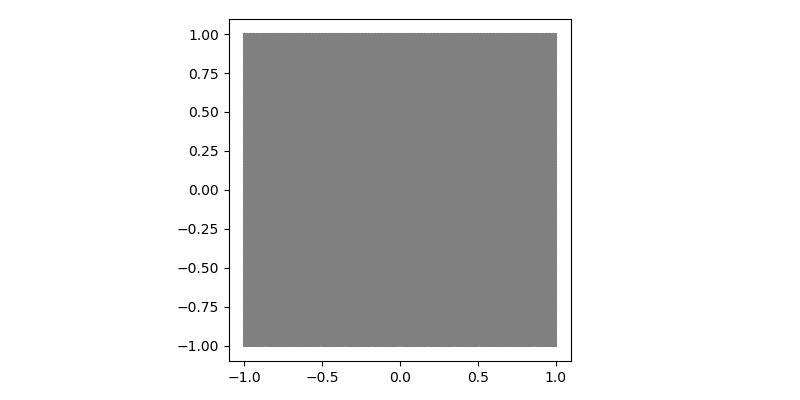

In [13]:
# Create a mesh to evaluate our function over
grid_x = 100
grid_y = 100 # Make the mesh finer by increasing these values
             # and the resulting plot will look smoother

mesh = fn.RectangleMesh(fn.Point(-1, -1), fn.Point(1, 1), grid_x, grid_y, 'left')
V1 = fn.FunctionSpace(mesh, "Lagrange", 1)

fig = plt.figure(figsize=(8,4))
fn.plot(mesh)
plt.tight_layout()
plt.show()

Now we define the piecewise function $u$ as a class, which is necessary for making the function into expression that FEniCS "understands." I used a suggestion from my classmate Lauren about defining the function at its boundaries so the resulting plot is continuous.

In [14]:
# Our pyramid function
class U(fn.UserExpression):
    
    def __init__(self, a, **kwargs):
        self.a = a
        super().__init__(**kwargs)
        
    def eval(self, v, x):
        v[0] = 0
        if (x[0] >= self.a) & (abs(x[1]) <= x[0]):
            v[0] = 1 - x[0]
        elif (x[0] < self.a) & (abs(x[1]) <= -x[0]):
            v[0] = 1 + x[0]
        elif (x[1] >= self.a) & (abs(x[0]) <= x[1]):
            v[0] = 1 - x[1]
        elif (x[1] < self.a) & (abs(x[0]) <= -x[1]):
            v[0] = 1 + x[1]
        return v
    
    def value_shape(self):
        return ()

Now we interpolate our function over the space of degree 1 Lagrange polynomials and plot the result. Since we are interpolating a plane, we don't need interpolating polynomials that exceed degree1. It's a pyramid!

<IPython.core.display.Javascript object>


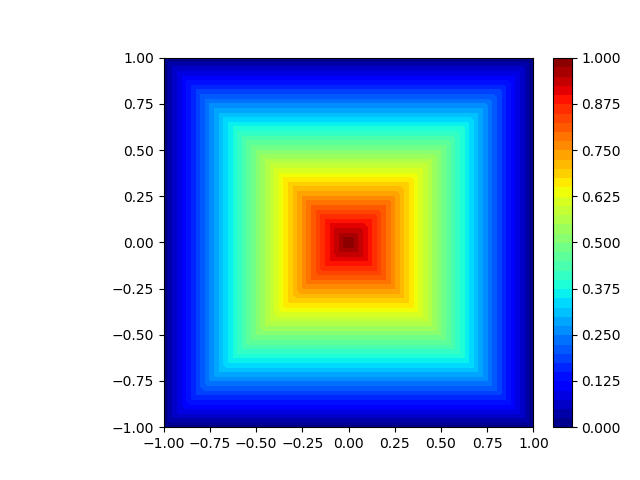

In [15]:
# Interpolate our function
my_interpolant = fn.interpolate( U(a=0, degree=1), V1)

# And plot it!
fig = plt.figure()
my_plot = fn.plot(my_interpolant)
my_plot.set_cmap("jet")
plt.colorbar(my_plot,fraction=0.046, pad=0.04)

### Solution 3. (b.)

Let $A:=\{x\in \mathbb{R}^2|x_1>0, |x_2|<x_1\}$, $B:=\{x\in \mathbb{R}^2|x_1<0, |x_2|<-x_1\}$, $C:=\{x\in \mathbb{R}^2|x_2>0, |x_1|<x_2\}$, and $D:=\{x\in \mathbb{R}^2|x_2<0, |x_1|<-x_2\}$.

We notice that given a fixed $x_1=\hat{x_1}\in(-1,1)$, $u\left(\hat{x_1},x_2\right)$ is constant for any choice $x_2 \in (-1,1)$ in $A \cap B$. Similarly, by fixing $x_2$, we have $u(x)$ constant for any $x_1\in(-1,1)$ in $C \cap D.$

We note that $u \in L^1_{loc}(\Omega)$ since for any open $S \Subset \Omega$, we have $u(x)<1$ for all $x \in S$. Hence $\int_S |u|^pdx<\int_S dx<\infty$ because the integral $\int_S dx<\int_\Omega dx=4$, the volume of a $2\times 2\times 1$ cube.  Let $v \in \mathcal{D}(\Omega)$.


$$T_u(v')=\int_\Omega uv'dx=\int_{A\cap B}uv' + \int_{C\cap D}uv'.$$ Now let $I:=\int_{A\cap B}uv'$ and $J:=\int_{C\cap D}uv'.$

Now $$I=\int_{x_2=-|x_1|}^{|x_1|} \left(\int_{x_1=-1}^0 (1+x_1)v'dx_1 + \int_{x_1=0}^1 (1-x_1)v'dx_1 \right)dx_2.$$

Using integration by parts on both integrals above, we obtain $$I=\int_{x_2=-|x_1|}^{|x_1|} \left(\left((1+x_1)v|_{-1}^0 - \int_{x_1=-1}^0 vdx_1 \right) + \left((1-x_1)v|_0^1+\int_{x_1=0}^1 vdx_1 \right)\right)dx_2.$$ Since supp$(v) \Subset \Omega$, $v(-1,x_2)=v(1,x_2)=0.$

Then $$I=\int_{x_2=-|x_1|}^{|x_1|} \left(v(0) - \int_{x_1=-1}^0 vdx_1  -v(0) +\int_{x_1=0}^1 vdx_1 \right)dx_2=-\int_{x_2=-|x_1|}^{|x_1|}\int_{x_1=-1}^1h_1(x)vdx_1dx_2,$$ where 

$$
			h_1(x_1,x_2) = \begin{cases}
				-1, & \text{if } x_1>0 \text{ and } |x_2|<x_1 \\
				1, & \text{if } x_1<0 \text{ and } |x_2|<-x_1 \\
				0, & \text{otherwise.}
			\end{cases}
$$

Now by symmetry, we have $$J=-\int_{x_1=-|x_2|}^{|x_2|}\int_{x_2=-1}^1h_2(x)vdx_2dx_1,$$ where

$$
			h_2(x_1,x_2) = \begin{cases}
				-1, & \text{if } x_2>0 \text{ and } |x_1|<x_2 \\
				1, & \text{if } x_2<0 \text{ and } |x_1|<-x_2 \\
				0, & \text{otherwise.}
			\end{cases}
$$


Therefore, we have $$T_u(v')=I+J=-\int_\Omega hvdx=-T_h(v), \quad h(x):=h_1(x)+h_2(x).$$ This shows that $h$ is the candidate for the first order weak derivative of $u$. Note that $h$ "looks like" the pointwise total derivative of $u$. Also, we note that $h \in L^1_{loc}(\Omega)$ since for any open $S \Subset \Omega$, we have $h(x)<1$ for all $x \in S$. Hence $\int_S |h|^pdx<\int_S dx<\infty$ as before.

Finally, note that $\max_{x\in \Omega}|u(x)|<1$ a.e., so $u \in L^\infty(\Omega)\implies u \in L^p (\Omega), 1 \leq p < \infty.$ Similarly, $\max_{x\in \Omega}|h(x)|<1$ a.e., so $h \in L^\infty(\Omega)\implies h \in L^p (\Omega), 1 \leq p < \infty.$ Here we are using the fact that $u$ and $h$ are essentially bounded to show they are $L^\infty$ fucntions; then, we rely on the so-called embedding result of $L^p$ spaces discussed in problem 2.

Therefore, $u \in W^{1,p}(\Omega)$ for $p \geq 1$ with $u'=h$ weakly.